In [1]:
# Install required libraries
!pip install yfinance timesfm

  Using cached nvidia_nvjitlink_cu12-12.6.20-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of googleapis-common-protos to determine which version is compatible with other requirements. This could take a while.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 

In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=0dcb0e84741b1e83e2a6df4f48a3c78f3cda49765683f8f8b78e989fe303bc0c
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import os
import time
import timesfm
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
# Load TimesFM model
timesfm_backend = "gpu"  # or 'cpu'
from jax._src import config
config.update("jax_platforms", {"cpu": "cpu", "gpu": "cuda", "tpu": ""}[timesfm_backend])

In [55]:
import yfinance as yf

# دانلود اطلاعات شرکت
ticker = 'AAPL'  # مثال: Apple Inc.
stock = yf.Ticker(ticker)

# دریافت اطلاعات استاتیک
market_cap = stock.info.get('marketCap')
sector = stock.info.get('sector')
industry = stock.info.get('industry')
employees = stock.info.get('fullTimeEmployees')
country = stock.info.get('country')
exchange = stock.info.get('exchange')
currency = stock.info.get('currency')

# نمایش اطلاعات استاتیک
print(f"Market Cap: {market_cap}")
print(f"Sector: {sector}")
print(f"Industry: {industry}")
print(f"Employees: {employees}")
print(f"Country: {country}")
print(f"Exchange: {exchange}")
print(f"Currency: {currency}")


Market Cap: 3448898060288
Sector: Technology
Industry: Consumer Electronics
Employees: 161000
Country: United States
Exchange: NMS
Currency: USD


In [56]:
import yfinance as yf
import ta
import pandas as pd

# تنظیمات
ticker = 'AAPL'  # Example: Apple Inc.
start_date = "2022-10-12"
end_date = "2024-01-01"
analysis_start_date = "2023-01-03"  # تاریخ شروع مورد نظر

# دانلود داده‌های سهام از Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)
data = data.resample('1D').ffill()


# محاسبه میانگین‌های متحرک و اندیکاتورهای تکنیکال
data['moving_avg_10'] = data['Close'].rolling(window=10).mean()
data['moving_avg_50'] = data['Close'].rolling(window=50).mean()
data['rsi'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
data['ema'] = ta.trend.EMAIndicator(data['Close'], window=10).ema_indicator()

# حذف سطرهایی که دارای مقادیر NaN هستند (به دلیل محاسبات میانگین‌های متحرک)


# فیلتر کردن داده‌ها از تاریخ شروع مورد نظر
data = data[data.index >= analysis_start_date]

# تنظیم DataFrame نهایی
df = data[['Close', 'Volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']].reset_index()
df.columns = ['date', 'close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# نمایش داده‌ها
df


[*********************100%%**********************]  1 of 1 completed


,close,volume,moving_avg_10,moving_avg_50,rsi,ema
date,,,,,,
2023-01-03,125.070000,112117500,129.418997,140.726199,28.126213,129.554483
2023-01-04,126.360001,89113600,128.868997,140.252599,32.455056,128.973668
2023-01-05,125.019997,80962700,128.184997,139.777199,30.406409,128.254819
2023-01-06,129.619995,87754700,128.143996,139.355199,43.573855,128.503033
2023-01-07,129.619995,87754700,128.501996,138.921799,43.573855,128.706117
...,...,...,...,...,...,...
2023-12-25,193.600006,37122800,195.188004,191.248201,50.022824,194.581887
2023-12-26,193.050003,28919300,194.736003,191.524601,47.619812,194.303362
2023-12-27,193.149994,48087700,194.294002,191.751201,48.107867,194.093659


In [58]:
# دریافت توصیه‌های مالی
recommendation_key = stock.recommendations

# دریافت تاریخ‌های مهم مالی
earnings_dates = stock.earnings_dates
dividend_dates = stock.dividends

# نمایش اطلاعات کتوگوریکال
print(f"Recommendation Key: {recommendation_key}")



Recommendation Key:   period  strongBuy  buy  hold  sell  strongSell
0     0m         11   21     6     0           0
1    -1m         12   21    10     1           0
2    -2m         12   19    12     1           0
3    -3m         10   24     7     1           0


In [59]:
static_numerical_covariates = {
    'market_cap': [market_cap],
    'employees': [employees]
}

static_categorical_covariates = {
    'sector': [sector],
    'industry': [industry],
    'country': [country],
    'exchange': [exchange],
    'currency': [currency]
}


dynamic_categorical_covariates = {
    'recommendation_key': recommendation_key
}


In [60]:


def get_batched_data_fn(batch_size: int = 32, context_len: int = 32, horizon_len: int = 1):
    examples = defaultdict(list)
    num_examples = 0
    for start in range(0, len(df) - (context_len + horizon_len), horizon_len):
        num_examples += 1
        context_end = start + context_len
        examples["inputs"].append(df["close"][start:context_end].tolist())
        examples["volume"].append(df["volume"][start:context_end].tolist() + [df["volume"].iloc[context_end - 1]])
        examples["moving_avg_10"].append(df["moving_avg_10"][start:context_end].tolist() + [df["moving_avg_10"].iloc[context_end - 1]])
        examples["moving_avg_50"].append(df["moving_avg_50"][start:context_end].tolist() + [df["moving_avg_50"].iloc[context_end - 1]])
        examples["rsi"].append(df["rsi"][start:context_end].tolist() + [df["rsi"].iloc[context_end - 1]])
        examples["ema"].append(df["ema"][start:context_end].tolist() + [df["ema"].iloc[context_end - 1]])
        examples["outputs"].append(df["close"][context_end:context_end + horizon_len].tolist())
        examples["dates"].append(df.index[start:context_end + horizon_len].tolist())  # Add dates to examples

    def data_fn():
        for i in range(1 + (num_examples - 1) // batch_size):
            yield {k: v[(i * batch_size): ((i + 1) * batch_size)] for k, v in examples.items()}

    return data_fn

In [6]:


# Define metrics
def mse(y_pred, y_true):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.mean(np.square(y_pred - y_true), axis=1, keepdims=True)

def mae(y_pred, y_true):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.mean(np.abs(y_pred - y_true), axis=1, keepdims=True)

In [7]:
import timesfm

context_len = 64
batch_size = 1  # ثابت نگه‌داشتن batch size
horizon_len = 1  # ثابت نگه‌داشتن horizon length



In [61]:

    model = timesfm.TimesFm(
        context_len=context_len,
        horizon_len=horizon_len,
        input_patch_len=32,
        output_patch_len=128,
        num_layers=20,
        model_dims=1280,
        backend="gpu",
    )
    model.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

Multiprocessing context has already been set.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing model weights.


Constructed model weights in 2.93 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 3.16 seconds.
Jitting decoding.
Jitted decoding in 21.87 seconds.


In [62]:
import os
import time
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import timesfm
import ta
from itertools import combinations
import gc
import json



features = ["volume", "moving_avg_10", "moving_avg_50", "rsi", "ema"]
feature_combinations = []
for r in range(1, len(features) + 1):
    feature_combinations.extend(combinations(features, r))
results_by_cov = []

for combo in feature_combinations:
    print(f"Processing combo: {combo}")
    input_data = get_batched_data_fn(batch_size=batch_size, context_len=context_len, horizon_len=1)
    metrics = defaultdict(list)


    # Process in smaller sub-batches
    for i, example in enumerate(input_data()):
        dynamic_numerical_covariates = {feature: example[feature] for feature in combo}
        raw_forecast, _ = model.forecast(
                            inputs=example["inputs"], freq=[0] * len(example["inputs"])
                        )
        cov_forecast, ols_forecast = model.forecast_with_covariates(
           inputs=example["inputs"],
           dynamic_numerical_covariates=dynamic_numerical_covariates,
           dynamic_categorical_covariates={},
           static_numerical_covariates=static_numerical_covariates,
           static_categorical_covariates=static_categorical_covariates,
           freq=[0] * len(example["inputs"]),
           normalize_xreg_target_per_input=True,
           xreg_mode="xreg + timesfm",)


        for j in range(len(example["inputs"])):
            result = {
                'input_index': j,
                'train_start_date': str(example["dates"][j][0]),
                'train_end_date': str(example["dates"][j][-2]),
                'predict_date': str(example["dates"][j][-1]),
                'raw_forecast': raw_forecast[j][0],
                'y_predict' : cov_forecast[j][0],
                'y_actual': example["outputs"][j][0],
                'batch_size': batch_size,
                'context_len': context_len,
                "timesfm + xreg":"timesfm + xreg",
                'combo' : combo,

            }
            results_by_cov.append(result)


Processing combo: ('volume',)
Processing combo: ('moving_avg_10',)
Processing combo: ('moving_avg_50',)
Processing combo: ('rsi',)
Processing combo: ('ema',)
Processing combo: ('volume', 'moving_avg_10')
Processing combo: ('volume', 'moving_avg_50')
Processing combo: ('volume', 'rsi')
Processing combo: ('volume', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50')
Processing combo: ('moving_avg_10', 'rsi')
Processing combo: ('moving_avg_10', 'ema')
Processing combo: ('moving_avg_50', 'rsi')
Processing combo: ('moving_avg_50', 'ema')
Processing combo: ('rsi', 'ema')
Processing combo: ('volume', 'moving_avg_10', 'moving_avg_50')
Processing combo: ('volume', 'moving_avg_10', 'rsi')
Processing combo: ('volume', 'moving_avg_10', 'ema')
Processing combo: ('volume', 'moving_avg_50', 'rsi')
Processing combo: ('volume', 'moving_avg_50', 'ema')
Processing combo: ('volume', 'rsi', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50', 'rsi')
Processing combo: ('moving_avg_10', 'movin

In [64]:
 results_df = pd.DataFrame(results_by_cov)
 results_df

,input_index,train_start_date,train_end_date,predict_date,raw_forecast,y_predict,y_actual,batch_size,context_len,timesfm + xreg,combo
0,0,2023-01-03 00:00:00,2023-03-07 00:00:00,2023-03-08 00:00:00,152.566696,152.568146,152.869995,1,64,timesfm + xreg,"(volume,)"
1,0,2023-01-04 00:00:00,2023-03-08 00:00:00,2023-03-09 00:00:00,153.315903,153.289413,150.589996,1,64,timesfm + xreg,"(volume,)"
2,0,2023-01-05 00:00:00,2023-03-09 00:00:00,2023-03-10 00:00:00,151.186523,151.244919,148.500000,1,64,timesfm + xreg,"(volume,)"
3,0,2023-01-06 00:00:00,2023-03-10 00:00:00,2023-03-11 00:00:00,149.242218,149.539703,148.500000,1,64,timesfm + xreg,"(volume,)"
4,0,2023-01-07 00:00:00,2023-03-11 00:00:00,2023-03-12 00:00:00,148.789383,149.141953,148.500000,1,64,timesfm + xreg,"(volume,)"
...,...,...,...,...,...,...,...,...,...,...,...
9171,0,2023-10-21 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,193.560013,193.346329,193.600006,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
9172,0,2023-10-22 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,193.652313,193.734055,193.600006,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
9173,0,2023-10-23 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,193.921982,193.817093,193.050003,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
9174,0,2023-10-24 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,193.380096,193.204407,193.149994,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"


In [65]:
# تبدیل نتایج به DataFrame
results_df = pd.DataFrame(results_df)

# ذخیره DataFrame به صورت pickle
results_df.to_pickle('combo _reg_timesfm_static.pkl')

print("DataFrame successfully saved as pickle file.")


DataFrame successfully saved as pickle file.


In [66]:
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score

# توابع محاسبه متریک‌ها
def calculate_mse(context_results_df_actual, context_results_df_predicted):
    return mean_squared_error(context_results_df_actual, context_results_df_predicted)

def calculate_accuracy(context_results_df_actual, context_results_df_predicted):
    correct_predictions = 0
    total_predictions = 0
    for i in range(1, len(context_results_df_actual)):
        actual_today = context_results_df_actual.iloc[i]
        predicted_today = context_results_df_predicted.iloc[i]
        actual_yesterday = context_results_df_actual.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - actual_yesterday
        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1

    return correct_predictions / total_predictions if total_predictions > 0 else 0

def calculate_profit(context_results_df_actual, context_results_df_predicted, initial_capital=100):
    capital = initial_capital
    position = 0

    for i in range(1, len(context_results_df_actual)):
        today_price = context_results_df_actual.iloc[i]
        yesterday_price = context_results_df_actual.iloc[i - 1]
        predicted_today_price = context_results_df_predicted.iloc[i]

        if predicted_today_price > yesterday_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * context_results_df_actual.iloc[-1]

    return capital - initial_capital

def calculate_actual_direction_accuracy(context_results_df_actual, context_results_df_predicted):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(context_results_df_actual)):
        real_directions.append(get_direction(context_results_df_actual.iloc[i - 1], context_results_df_actual.iloc[i]))
        predicted_directions.append(get_direction(context_results_df_actual.iloc[i - 1], context_results_df_predicted.iloc[i]))

    return accuracy_score(real_directions, predicted_directions)

def calculate_direction_accuracy(context_results_df_actual, context_results_df_predicted):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(context_results_df_actual)):
        real_directions.append(get_direction(context_results_df_actual.iloc[i - 1], context_results_df_actual.iloc[i]))
        predicted_directions.append(get_direction(context_results_df_predicted.iloc[i - 1], context_results_df_predicted.iloc[i]))

    return accuracy_score(real_directions, predicted_directions)

def calculate_direction_profit(context_results_df_actual, context_results_df_predicted, initial_capital=100):
    capital = initial_capital
    position = 0

    for i in range(2, len(context_results_df_actual)):
        yesterday_price = context_results_df_actual.iloc[i - 1]
        yesterday_predicted_today_price = context_results_df_predicted.iloc[i - 1]
        predicted_today_price = context_results_df_predicted.iloc[i]

        if predicted_today_price > yesterday_predicted_today_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_predicted_today_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * context_results_df_actual.iloc[-1]

    return capital - initial_capital

def calculate_results_for_combo(combo, context_results_df_actual, context_results_df_predicted):
    # محاسبه مقادیر متریک‌ها
    mse_value = calculate_mse(context_results_df_actual, context_results_df_predicted)
    accuracy_value = calculate_accuracy(context_results_df_actual, context_results_df_predicted)
    profit = calculate_profit(context_results_df_actual, context_results_df_predicted)
    direction_accuracy = calculate_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    actual_direction_accuracy = calculate_actual_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    direction_profit = calculate_direction_profit(context_results_df_actual, context_results_df_predicted)

    # ساخت دیکشنری از نتایج محاسبه شده
    result = {
        'combo': combo,
        'mse': mse_value,
        'accuracy': accuracy_value,
        'direction_accuracy': direction_accuracy,
        'actual_direction_accuracy': actual_direction_accuracy,
        'direction_profit': direction_profit,
        'profit': profit
    }

    return pd.DataFrame([result])

# حالا نتایج را برای هر combo حساب می‌کنیم
final_results = []

for combo in results_df['combo'].unique():
    combo_data_actual = results_df[results_df['combo'] == combo]['y_actual']
    combo_data_predicted = results_df[results_df['combo'] == combo]['y_predict']

    combo_results_df = calculate_results_for_combo(combo, combo_data_actual, combo_data_predicted)
    final_results.append(combo_results_df)

# ترکیب تمام نتایج در یک DataFrame
final_results_df = pd.concat(final_results).reset_index(drop=True)

# نمایش نتایج نهایی
print(final_results_df)


                                               combo       mse  accuracy  \
0                                          (volume,)  3.853742  0.338983   
1                                   (moving_avg_10,)  3.585444  0.335593   
2                                   (moving_avg_50,)  3.831339  0.338983   
3                                             (rsi,)  3.592674  0.301695   
4                                             (ema,)  3.555477  0.359322   
5                            (volume, moving_avg_10)  3.547727  0.335593   
6                            (volume, moving_avg_50)  3.999197  0.315254   
7                                      (volume, rsi)  3.773099  0.335593   
8                                      (volume, ema)  3.558614  0.325424   
9                     (moving_avg_10, moving_avg_50)  3.672015  0.311864   
10                              (moving_avg_10, rsi)  3.153298  0.362712   
11                              (moving_avg_10, ema)  3.460787  0.301695   
12          

In [67]:

# پیدا کردن بهترین combo‌ها برای هر معیار
best_mse_combo = final_results_df.loc[final_results_df['mse'].idxmin()]
best_accuracy_combo = final_results_df.loc[final_results_df['accuracy'].idxmax()]
best_profit_combo = final_results_df.loc[final_results_df['profit'].idxmax()]
best_direction_accuracy_combo = final_results_df.loc[final_results_df['direction_accuracy'].idxmax()]
best_actual_direction_accuracy_combo = final_results_df.loc[final_results_df['actual_direction_accuracy'].idxmax()]
best_direction_profit_combo = final_results_df.loc[final_results_df['direction_profit'].idxmax()]

# نمایش بهترین ترکیب‌ها برای هر معیار
print("Best Combinations by Metric:")
print(f"Best MSE Combo: {best_mse_combo['combo']} with MSE: {best_mse_combo['mse']}")
print(f"Best Accuracy Combo: {best_accuracy_combo['combo']} with Accuracy: {best_accuracy_combo['accuracy']}")
print(f"Best Profit Combo: {best_profit_combo['combo']} with Profit: {best_profit_combo['profit']}")
print(f"Best Direction Accuracy Combo: {best_direction_accuracy_combo['combo']} with Direction Accuracy: {best_direction_accuracy_combo['direction_accuracy']}")
print(f"Best Actual Direction Accuracy Combo: {best_actual_direction_accuracy_combo['combo']} with Actual Direction Accuracy: {best_actual_direction_accuracy_combo['actual_direction_accuracy']}")
print(f"Best Direction Profit Combo: {best_direction_profit_combo['combo']} with Direction Profit: {best_direction_profit_combo['direction_profit']}")

Best Combinations by Metric:
Best MSE Combo: ('moving_avg_10', 'rsi') with MSE: 3.1532982697795346
Best Accuracy Combo: ('moving_avg_10', 'moving_avg_50', 'rsi') with Accuracy: 0.3694915254237288
Best Profit Combo: ('moving_avg_10', 'rsi') with Profit: 25.967491055145572
Best Direction Accuracy Combo: ('moving_avg_10', 'ema') with Direction Accuracy: 0.5152542372881356
Best Actual Direction Accuracy Combo: ('moving_avg_10', 'rsi') with Actual Direction Accuracy: 0.6033898305084746
Best Direction Profit Combo: ('volume', 'rsi') with Direction Profit: 25.841844595203938


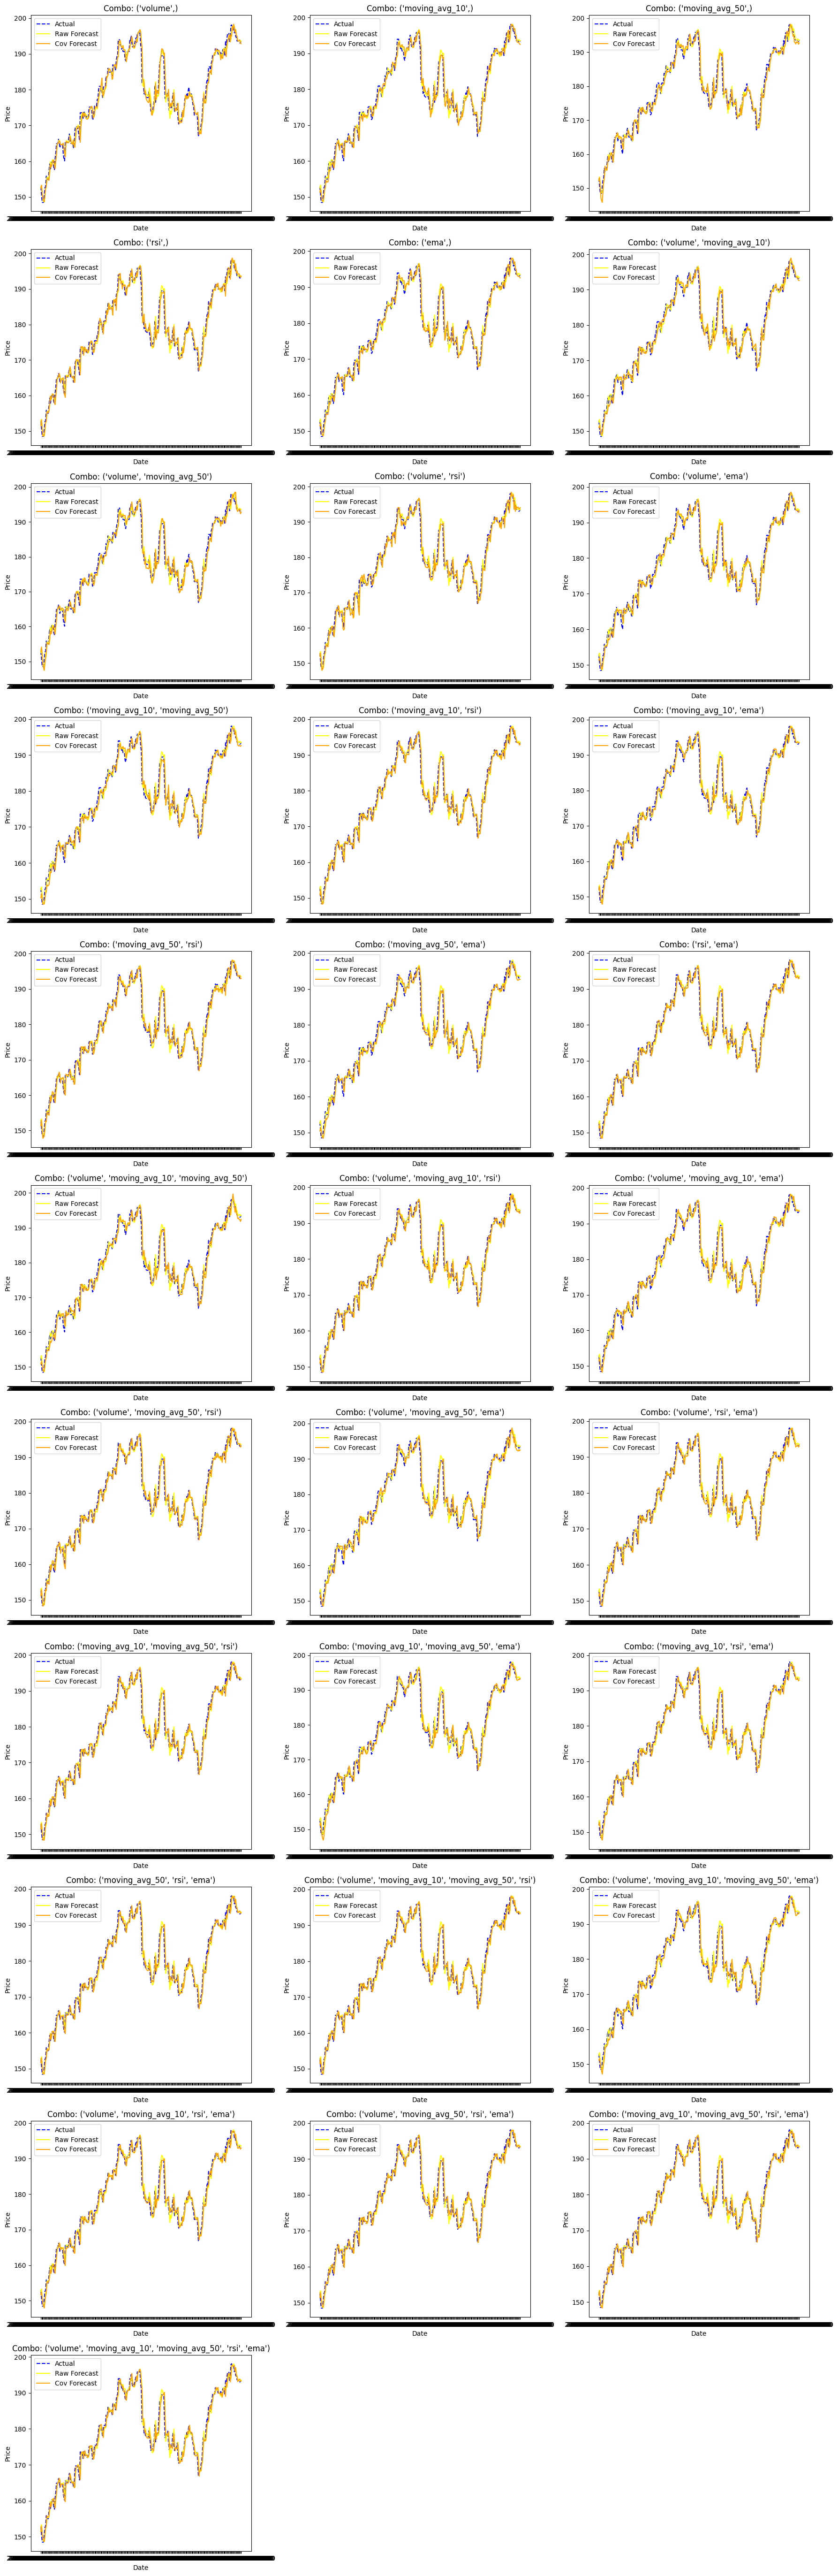

In [68]:
# تبدیل نتایج نهایی به یک DataFrame


# تعداد سطرها و ستون‌ها برای نمودارها
num_columns = 3
num_combos = len(feature_combinations)
num_rows = math.ceil(num_combos / num_columns)

# ایجاد نمودارهای چندگانه
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))

# تبدیل axes به یک لیست مسطح برای دسترسی آسان
axes = axes.flatten()

for idx, combo in enumerate(feature_combinations):
    combo_results = results_df[results_df['combo'] == combo]


    axes[idx].plot(combo_results['predict_date'], combo_results['y_actual'], label='Actual', color='blue', linestyle='--')
    axes[idx].plot(combo_results['predict_date'], combo_results['raw_forecast'], label='Raw Forecast', color='yellow')
    axes[idx].plot(combo_results['predict_date'], combo_results['y_predict'], label='Cov Forecast', color='orange')

    axes[idx].set_title(f'Combo: {combo}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price')
    axes[idx].legend()

# حذف هر subplot خالی
for ax in axes[num_combos:]:
    fig.delaxes(ax)

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()


In [69]:
# محاسبه‌ی متریک‌ها برای پیش‌بینی خام (Raw Forecast)
results_df=results_df[results_df['combo'] == combo]
y_actual = results_df['y_actual'].values
raw_forecast = results_df['raw_forecast'].values


# محاسبه متریک‌ها با استفاده از توابع از پیش تعریف شده
mse_value = calculate_mse(pd.Series(y_actual), pd.Series(raw_forecast))
accuracy_value = calculate_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
profit_value = calculate_profit(pd.Series(y_actual), pd.Series(raw_forecast))
direction_accuracy_value = calculate_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
actual_direction_accuracy_value = calculate_actual_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
direction_profit_value = calculate_direction_profit(pd.Series(y_actual), pd.Series(raw_forecast))

# نمایش نتایج محاسباتی
print(f"MSE: {mse_value}")
print(f"Accuracy: {accuracy_value}")
print(f"Profit: {profit_value}")
print(f"Direction Accuracy: {direction_accuracy_value}")
print(f"Actual Direction Accuracy: {actual_direction_accuracy_value}")
print(f"Direction Profit: {direction_profit_value}")


MSE: 3.659855458404038
Accuracy: 0.36610169491525424
Profit: 12.19780804281011
Direction Accuracy: 0.488135593220339
Actual Direction Accuracy: 0.5050847457627119
Direction Profit: 14.153185864073976
